<a href="https://colab.research.google.com/github/Sanket1909/yahoo-finance/blob/main/AIDI_1100_FINAL__GROUP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

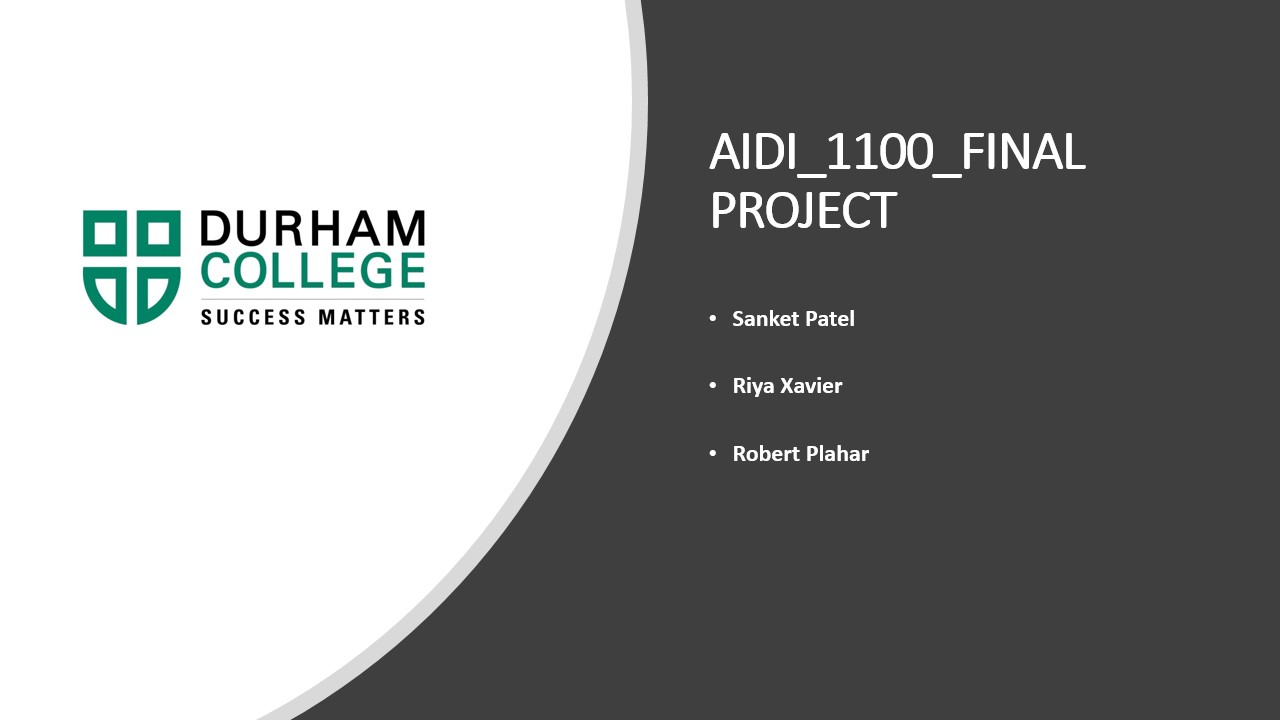




In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import datetime
import warnings 
import requests
import pandas_datareader as web
#libraries for getting data from online sources
import pandas_datareader as pdr
import yfinance as yfin
yfin.pdr_override()
#suppress warnings
warnings.filterwarnings('ignore')
from google.colab import data_table
import smtplib
from email.message import EmailMessage
import ssl  
pages= 1

In [4]:
upperframe=[]  
for news in range(1,pages+1):
    print('News Website Page :', news)
    #news link
    url = 'https://www.politifact.com/factchecks/list/?page='+str(news)
    print(url)
    
    
    try:
        head=requests.get(url)                             
    except Exception as e:                                   
        error_type, error_obj, error_info = sys.exc_info()      
        print ('ERROR FOR LINK:',url)                          
        print (error_type, 'Line:', error_info.tb_lineno)     
        continue                                              
    time.sleep(2)   
    soup=BeautifulSoup(head.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))
    #store news in headlines.csv
    filename="HEADLINES.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Headline,Link,Date, Source, Label\n"
    f.write(headers)
for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        #news link
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label))
        f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+"\n")
        upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Headline','Link','Date','Source','Label'])
data    

News Website Page : 1
https://www.politifact.com/factchecks/list/?page=1
30


,Headline,Link,Date,Source,Label
0,There are a record high cases of flu in the U....,https://www.politifact.com/factchecks/2022/dec...,"mber 15, 2022",Instagram posts,false
1,There are a record high cases of flu in the U....,https://www.politifact.com/factchecks/2022/dec...,"mber 15, 2022",Instagram posts,false
2,Stephen Boss died because of the COVID-19 vacc...,https://www.politifact.com/factchecks/2022/dec...,"mber 15, 2022",Tweets,false
3,There are a record high cases of flu in the U....,https://www.politifact.com/factchecks/2022/dec...,"mber 15, 2022",Instagram posts,false
4,Stephen Boss died because of the COVID-19 vacc...,https://www.politifact.com/factchecks/2022/dec...,"mber 15, 2022",Tweets,false
...,...,...,...,...,...
460,"“Since the COVID jabs were rolled out, at leas...",https://www.politifact.com/factchecks/2022/dec...,"ember 9, 2022",Instagram posts,false
461,Fluctuating vote count in Fox News coverage of...,https://www.politifact.com/factchecks/2022/dec...,"ember 9, 2022",Viral image,false
462,Rod Stewart’s son “was rushed to the hospital ...,https://www.politifact.com/factchecks/2022/dec...,"ember 9, 2022",Instagram posts,pants-fire
463,Video shows a child telling Jill Biden to “shu...,https://www.politifact.com/factchecks/2022/dec...,"ember 9, 2022",Instagram posts,false


In [5]:
def mail1(): 
  servers = 'patelsankko4545@gmail.com'
  password = 'jwlvfejayqxtmwta'
  reciver = 'patelsankko4545@gmail.com'
  subject = "Stock Market Update"
  body = "Buy Stock"
  em = EmailMessage()
  em['From'] = servers
  em['To'] = reciver
  em ['Subject'] = subject
  em.set_content(body)

  context = ssl.create_default_context()

  with smtplib.SMTP_SSL('smtp.gmail.com',465,context=context) as smtp:
      smtp.login(servers,password)
      smtp.sendmail(servers,reciver,em.as_string())

In [6]:
def mail2(): 
  servers = 'patelsankko4545@gmail.com'
  password = 'jwlvfejayqxtmwta'
  reciver = 'patelsankko4545@gmail.com'
  subject = "Stock Market Upadte"
  body = "Dont Buy Stock"
  em = EmailMessage()
  em['From'] = servers
  em['To'] = reciver
  em ['Subject'] = subject
  em.set_content(body)

  context = ssl.create_default_context()

  with smtplib.SMTP_SSL('smtp.gmail.com',465,context=context) as smtp:
      smtp.login(servers,password)
      smtp.sendmail(servers,reciver,em.as_string())

In [7]:
def mail3(): 
  servers = 'patelsankko4545@gmail.com'
  password = 'jwlvfejayqxtmwta'
  reciver = 'patelsankko4545@gmail.com'
  subject = "Stock Market Update"
  body = "WAIT BEFORE BUYING STOCK!"
  em = EmailMessage()
  em['From'] = servers
  em['To'] = reciver
  em ['Subject'] = subject
  em.set_content(body)

  context = ssl.create_default_context()

  with smtplib.SMTP_SSL('smtp.gmail.com',465,context=context) as smtp:
      smtp.login(servers,password)
      smtp.sendmail(servers,reciver,em.as_string())

In [8]:
session = requests.session()
session.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'

We will Consider the following companies for our analysis: CITYBANK(C),Wells Fargo(WFC),HSBC,Amazon(AMZN) and TESLA(TSLA)

In [9]:
stocks = ["HSBC","WFC","C","AMZN","TSLA"]
df = web.DataReader(stocks, data_source='yahoo', start='2022-5-10', end='2022-12-09', session=session)
print(df.shape)

(149, 30)


In [10]:
pd.options.display.max_columns =None
pd.options.display.max_rows =None
df


Attributes  Adj Close                                                \
Symbols          HSBC        WFC          C        AMZN        TSLA   
Date                                                                  
2022-05-10  30.331190  42.511738  47.721722  108.859001  266.679993   
2022-05-11  29.867592  42.008465  46.654713  105.372002  244.666672   
2022-05-12  29.147533  41.258492  45.577919  106.930496  242.666672   
2022-05-13  30.291735  42.077538  46.635136  113.055000  256.529999   
2022-05-16  30.360783  41.653214  46.458931  110.810501  241.456665   
2022-05-17  30.982201  43.133427  49.973206  115.368500  253.869995   
2022-05-18  30.153641  41.554531  48.279701  107.112503  236.603333   
2022-05-19  30.104322  41.445984  48.729996  107.319000  236.473328   
2022-05-20  30.331190  41.120335  48.700630  107.591003  221.300003   
2022-05-23  30.972336  43.241974  51.656929  107.556999  224.966660   
2022-05-24  32.274361  42.718967  51.568825  104.099998  209.386673   
2022-05-25  32.372997  43.538021  51.588406  106.775002  219.600006   
2022-05-26  32.560406  44.998497  52.949089  111.077499  235.910004   
2022-05-27  33.231148  45.284672  52.488998  115.146500  253.210007   
2022-05-31  33.004280  45.166256  52.283428  120.209503  252.753326   
2022-06-01  32.688637  44.564301  51.284943  121.683998  246.789993   
2022-06-02  32.915504  44.732059  51.324100  125.511002  258.333344   
2022-06-03  32.520954  44.228783  50.247307  122.349998  234.516663   
2022-06-06  32.925369  44.524826  50.315826  124.790001  238.279999   
2022-06-07  33.004280  44.870213  51.001060  123.000000  238.886673   
2022-06-08  32.057354  44.041294  50.325615  121.180000  241.866669   
2022-06-09  31.347162  42.107143  48.915989  116.150002  239.706665   
2022-06-10  30.390371  39.551311  46.703659  109.650002  232.229996   
2022-06-13  30.252279  38.475693  44.726265  103.669998  215.736664   
2022-06-14  30.715878  36.936268  44.990570  102.309998  220.889999   
2022-06-15  31.721985  37.666504  46.576405  107.669998  233.000000   
2022-06-16  31.199203  37.153366  45.900955  103.660004  213.100006   
2022-06-17  30.548193  37.972412  45.538761  106.220001  216.759995   
2022-06-21  32.678776  38.475693  46.948383  108.680000  237.036667   
2022-06-22  32.205315  38.090828  46.204414  108.949997  236.086670   
2022-06-23  31.899534  37.400070  45.372345  112.440002  235.070007   
2022-06-24  32.580135  40.222340  46.850494  116.459999  245.706665   
2022-06-27  32.471634  39.709202  46.821129  113.220001  244.919998   
2022-06-28  32.550545  39.649990  46.214203  107.400002  232.663330   
2022-06-29  32.935234  39.186192  46.106522  108.919998  228.490005   
2022-06-30  32.225037  38.653313  45.019939  106.209999  224.473328   
2022-07-01  32.234905  39.393417  45.881374  109.559998  227.263336   
2022-07-05  31.179478  39.571045  45.626862  113.500000  233.066666   
2022-07-06  30.725742  38.978962  45.176563  114.330002  231.733337   
2022-07-07  31.623350  39.590782  45.940109  116.330002  244.543335   
2022-07-08  31.149885  39.649990  45.832432  115.540001  250.763336   
2022-07-11  30.972336  39.265137  45.215717  111.750000  234.343338   
2022-07-12  30.923018  39.077641  45.156986  109.220001  233.070007   
2022-07-13  30.942747  38.554630  44.540276  110.400002  237.039993   
2022-07-14  29.946503  38.228989  43.208958  110.629997  238.313339   
2022-07-15  30.232552  40.587460  48.925777  113.550003  240.066666   
2022-07-18  30.587648  40.646667  49.013878  113.760002  240.546661   
2022-07-19  31.140022  42.334114  51.030430  118.209999  245.529999   
2022-07-20  30.518602  42.156487  51.343678  122.769997  247.500000   
2022-07-21  30.903290  42.709099  51.480724  124.629997  271.706665   
2022-07-22  30.498875  42.600548  50.815067  122.419998  272.243347   
2022-07-25  31.396481  42.926197  51.059795  121.139999  268.433319   
2022-07-26  30.972336  42.334114  50.315826  114.809998  258.859985   
2022-07-27  31.514847  4

Retrieving only Adj Close for all stocks

In [11]:
df_stocks_adj_close = df['Adj Close']
df_stocks_adj_close

Symbols,HSBC,WFC,C,AMZN,TSLA
Date,,,,,
2022-05-10,30.331190,42.511738,47.721722,108.859001,266.679993
2022-05-11,29.867592,42.008465,46.654713,105.372002,244.666672
2022-05-12,29.147533,41.258492,45.577919,106.930496,242.666672
2022-05-13,30.291735,42.077538,46.635136,113.055000,256.529999
2022-05-16,30.360783,41.653214,46.458931,110.810501,241.456665
2022-05-17,30.982201,43.133427,49.973206,115.368500,253.869995
2022-05-18,30.153641,41.554531,48.279701,107.112503,236.603333
2022-05-19,30.104322,41.445984,48.729996,107.319000,236.473328
2022-05-20,30.331190,41.120335,48.700630,107.591003,221.300003


Studying the summary statistics of the Adjusted Close Values

In [12]:
df_stocks_adj_close.describe()

Symbols,HSBC,WFC,C,AMZN,TSLA
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,30.007458,43.066429,47.501500,114.900191,244.151052
std,2.242173,2.647009,3.231133,14.604580,39.022166
min,25.010000,36.936268,39.987247,86.139999,167.869995
25%,28.250000,41.313919,45.130001,106.775002,219.350006
50%,30.540001,43.241974,47.688129,114.559998,238.886673
75%,31.623350,45.059788,50.315826,124.629997,277.700012
max,33.231148,47.950001,53.757889,144.779999,309.320007


Market Capitalization

In [13]:
from tables.description import descr_from_dtype
df_open = df[['Open','Volume']]
df_open

Attributes       Open                                                \
Symbols          HSBC        WFC          C        AMZN        TSLA   
Date                                                                  
2022-05-10  30.959999  44.389999  50.540001  111.250000  273.103333   
2022-05-11  30.780001  43.110001  48.950001  108.103500  265.000000   
2022-05-12  29.680000  42.230000  47.259998  102.750000  233.666672   
2022-05-13  30.330000  42.450001  46.810001  109.069000  257.826660   
2022-05-16  30.580000  42.400002  47.590000  113.099998  255.720001   
2022-05-17  31.330000  42.990002  49.840000  113.275002  249.119995   
2022-05-18  30.740000  43.290001  50.730000  111.439499  248.173340   
2022-05-19  30.240000  41.700001  48.660000  106.280502  235.666672   
2022-05-20  31.120001  42.509998  50.259998  109.568497  237.996674   
2022-05-23  31.240000  42.730000  51.349998  108.460999  218.339996   
2022-05-24  32.570000  43.689999  52.470001  104.025002  217.843338   
2022-05-25  32.750000  43.090000  52.560001  103.655502  207.949997   
2022-05-26  32.900002  44.830002  53.459999  107.970001  220.473328   
2022-05-27  33.660000  45.700001  54.000000  113.550003  241.083328   
2022-05-31  33.380001  45.340000  53.029999  116.279999  257.946655   
2022-06-01  33.560001  45.959999  53.500000  122.255997  251.720001   
2022-06-02  33.139999  45.119999  52.400002  121.683998  244.156662   
2022-06-03  33.130001  44.830002  52.070000  124.199997  243.226669   
2022-06-06  33.689999  45.340000  51.799999  125.250000  244.353333   
2022-06-07  33.169998  44.759998  51.029999  122.010002  234.000000   
2022-06-08  32.750000  44.880001  51.700001  122.610001  240.086670   
2022-06-09  32.240002  44.580002  51.540001  119.989998  249.339996   
2022-06-10  31.129999  41.029999  48.720001  113.419998  235.156662   
2022-06-13  30.629999  38.980000  46.660000  104.190002  223.166672   
2022-06-14  31.299999  38.770000  46.189999  104.190002  218.286667   
2022-06-15  32.250000  38.000000  46.470001  103.860001  220.916672   
2022-06-16  31.480000  37.360001  46.799999  104.470001  222.736664   
2022-06-17  31.400000  37.830002  47.119999  102.800003  213.433334   
2022-06-21  33.290001  39.860001  47.959999  108.199997  224.603333   
2022-06-22  32.500000  38.389999  47.330002  107.430000  234.503326   
2022-06-23  32.689999  38.060001  46.869999  110.389999  237.906662   
2022-06-24  32.689999  38.680000  45.560001  112.379997  237.470001   
2022-06-27  33.049999  40.840000  48.060001  117.089996  249.366669   
2022-06-28  33.349998  40.970001  48.400002  113.500000  244.483337   
2022-06-29  33.680000  40.270000  47.259998  107.379997  230.500000   
2022-06-30  32.480000  39.070000  46.220001  108.110001  224.509995   
2022-07-01  32.200001  38.720001  45.740002  106.290001  227.000000   
2022-07-05  31.420000  39.000000  45.689999  107.599998  223.000000   
2022-07-06  30.959999  39.610001  46.299999  113.209999  230.779999   
2022-07-07  31.889999  40.209999  46.910000  113.849998  233.919998   
2022-07-08  31.590000  40.299999  47.259998  114.599998  242.333328   
2022-07-11  31.490000  39.669998  46.419998  114.080002  252.103333   
2022-07-12  31.000000  39.080002  45.580002  112.160004  236.846664   
2022-07-13  31.340000  39.080002  45.700001  107.029999  225.500000   
2022-07-14  30.420000  38.090000  44.480000  110.239998  234.896667   
2022-07-15  30.309999  39.400002  47.000000  112.500000  240.000000   
2022-07-18  31.139999  41.930000  50.660000  115.000000  244.936661   
2022-07-19  31.370001  41.880001  50.880001  115.699997  245.000000   
2022-07-20  31.100000  42.540001  51.500000  118.620003  246.783340   
2022-07-21  30.690001  42.480000  52.110001  123.199997  255.106674   
2022-07-22  30.990000  43.169998  52.520000  125.010002  276.220001   
2022-07-25  31.770000  43.529999  52.430000  122.699997  272.216675   
2022-07-26  31.549999  43.110001  51.770000  115.790001  266.513336   
2022-07-27  31.620001  4

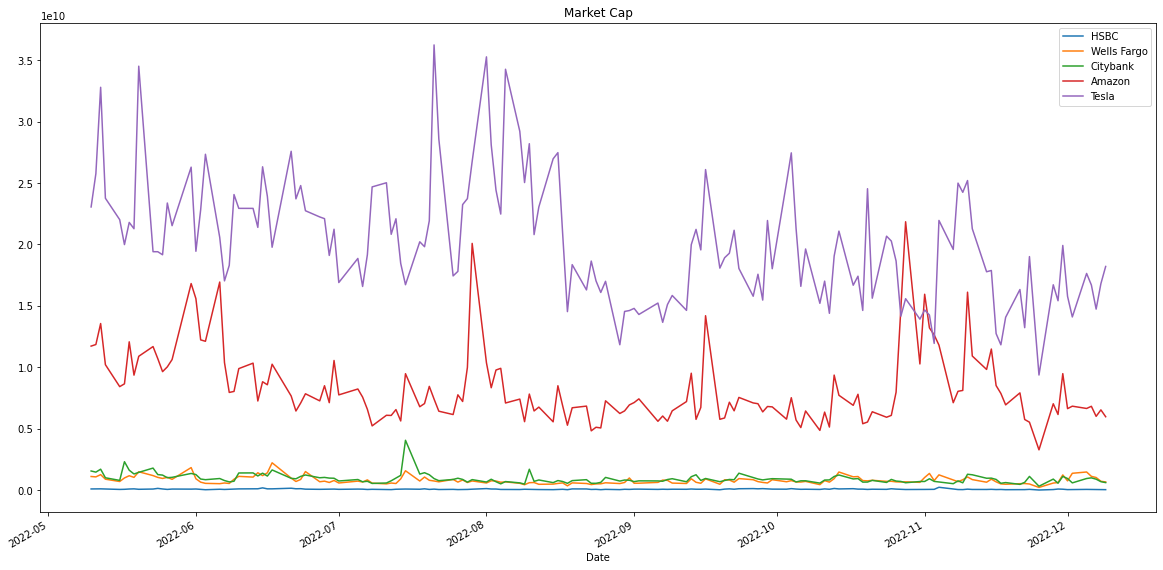

In [14]:
# create a blank dataframe 
df_mkt = pd.DataFrame()
#calculate market. cap for each symbol
df_mkt['HSBC_mktcap'] = df_open['Open']['HSBC'] * df_open['Volume']['HSBC']
df_mkt['WFC_mktcap'] = df_open['Open']['WFC'] * df_open['Volume']['WFC']
df_mkt['C_mktcap'] = df_open['Open']['C'] * df_open['Volume']['C']
df_mkt['AMZN_mktcap'] = df_open['Open']['AMZN'] * df_open['Volume']['AMZN']
df_mkt['TSLA_mktcap'] = df_open['Open']['TSLA'] * df_open['Volume']['TSLA']

#drop any missing values
df_mkt.dropna(axis=0,inplace=True)
#plot the charts
plt.rcParams['figure.figsize'] = [20,10]
df_mkt['HSBC_mktcap'].plot(label = 'HSBC')
df_mkt['WFC_mktcap'].plot(label = 'Wells Fargo')
df_mkt['C_mktcap'].plot(label = 'Citybank')
df_mkt['AMZN_mktcap'].plot(label = 'Amazon')
df_mkt['TSLA_mktcap'].plot(label = 'Tesla')
#set charts attributes
plt.title('Market Cap')
plt.legend()
plt.show()

Study the pattern for TSLA Stock

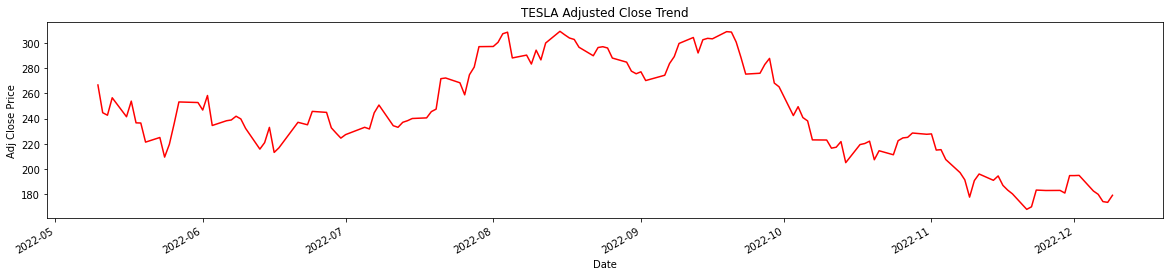

In [15]:
#filter the data for TSLA in the form of dataframe
df_tsla = df_stocks_adj_close[['TSLA']]
plt.figure(figsize=(20,4))
df_tsla["TSLA"].plot(color='red')
plt.title('TESLA Adjusted Close Trend')
plt.ylabel('Adj Close Price')
plt.show()

Study the Daily Percentage of adj close for TSLA

In [16]:
#Calculate the daily percentage change
#The formula for percentage change is:(Previous Price - Current Price)/Previous Price * 100
df_tsla['day_perc_change'] = df_tsla["TSLA"].pct_change()*100
df_tsla.head()

Symbols,TSLA,day_perc_change
Date,,
2022-05-10,266.679993,NaN
2022-05-11,244.666672,-8.254583
2022-05-12,242.666672,-0.817439
2022-05-13,256.529999,5.712909
2022-05-16,241.456665,-5.875856


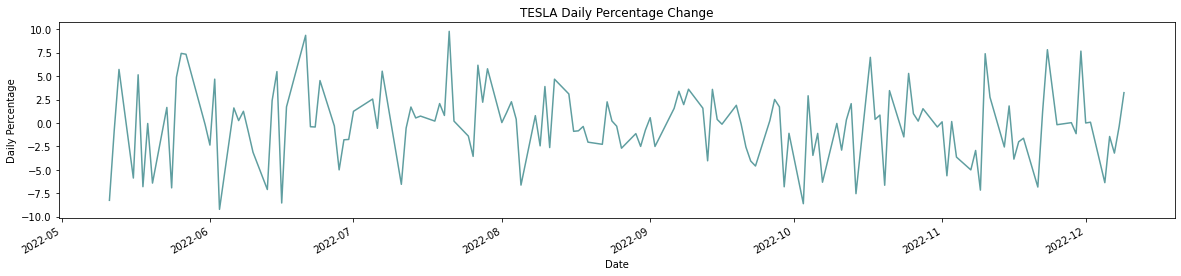

In [17]:
#remove all missing data
df_tsla.dropna(axis=0,inplace=True)

#plot the percentage change chart

plt.figure(figsize=(20,4))
df_tsla['day_perc_change'].plot(color='cadetblue')
plt.title('TESLA Daily Percentage Change')
plt.ylabel('Daily Percentage')
plt.show()

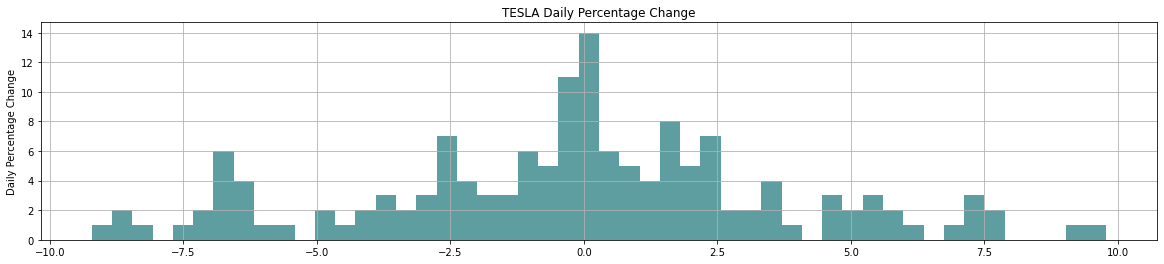

In [18]:
#histogram
plt.figure(figsize=(20,4))
df_tsla['day_perc_change'].hist(bins=50,color='cadetblue')
plt.title('TESLA Daily Percentage Change')
plt.ylabel('Daily Percentage Change')
plt.show()


**Categorize the daily percentage change into different categories like Positive Change ,Negative Change **

In [19]:
#percentage change will be positive if the stock price has gone up ,and negative if the stock price has gone down here

def category(x):
  if x >= 8:
    return mail1()
    #"Buy Stock"
  elif x<= -8:
     return mail2()
    #"Dont Buy Stock"
  elif  x > -1 and x<= 0:
    return mail3()
    #"WAIT BEFORE BUYING STOCK!"
    


#call the function to categorize the daily percentage change
df_tsla['ChangeType'] = df_tsla['day_perc_change'].apply(lambda x:category(x))  
df_tsla


  


Symbols,TSLA,day_perc_change,ChangeType
Date,,,
2022-05-11,244.666672,-8.254583,None
2022-05-12,242.666672,-0.817439,None
2022-05-13,256.529999,5.712909,None
2022-05-16,241.456665,-5.875856,None
2022-05-17,253.869995,5.141018,None
2022-05-18,236.603333,-6.801380,None
2022-05-19,236.473328,-0.054946,None
2022-05-20,221.300003,-6.416506,None
2022-05-23,224.966660,1.656871,None
